In [1]:
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import *
import numpy as np
import math
from sklearn.datasets import make_classification
from numpy import linalg
from collections import Counter

from implementation import *

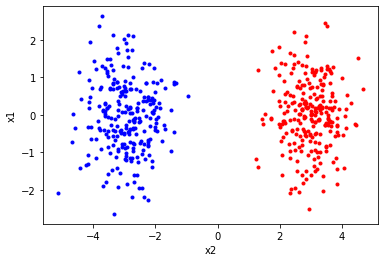

In [2]:
"""
Generate 2D 2 class, linearly separable data
"""

# We utilize make_classification and try generating data until it creates linearly separable one
# separable = False
# while not separable:
#     samples = make_classification(n_classes=2,n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,class_sep=3.0)#, flip_y=0.05)
#     red = samples[0][samples[1] == 0]
#     blue = samples[0][samples[1] == 1]
#     # Test for vertical and horizontal separation
#     separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
# plt.plot(red[:, 0], red[:, 1], 'r.')
# plt.plot(blue[:, 0], blue[:, 1], 'b.')
# plt.xlabel('x2')
# plt.ylabel('x1')
# plt.show()

# To ensure result similar to the report please use the below code which loads the data generated from previous step
red, blue = np.load('linearly_separable_class0.npy'), np.load('linearly_separable_class1.npy')
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

# Group data into one matrix and assign labels
X = np.vstack((red,blue))
y = np.hstack((np.array([-1]*red.shape[0]),np.ones(blue.shape[0])))

# Shuffle X and y in a consistent way
X, y = shuffle(X, y, random_state=42)

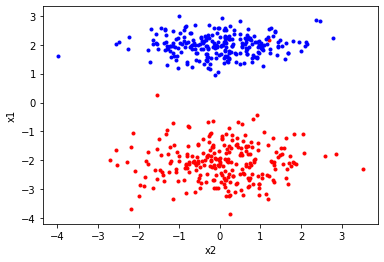

In [3]:
"""
Generate 2D 2 class, linearly separable data
"""

# We utilize make_classification and try generating data until it creates non linearly separable one
# separable = True
# while separable:
#     samples = make_classification(n_classes=2,n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1,class_sep=2.0, flip_y=0.01)
#     red = samples[0][samples[1] == 0]
#     blue = samples[0][samples[1] == 1]
#     # Test for vertical and horizontal separation
#     separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])

# plt.plot(red[:, 0], red[:, 1], 'r.')
# plt.plot(blue[:, 0], blue[:, 1], 'b.')
# plt.xlabel('x2')
# plt.ylabel('x1')
# plt.show()
# To ensure result similar to the report please use the below code which loads the data generated from previous step
red, blue = np.load('nonlinearly_separable_class0.npy'), np.load('nonlinearly_separable_class1.npy')
plt.plot(red[:, 0], red[:, 1], 'r.')
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

# Group data into one matrix and assign labels
X_non_sep = np.vstack((red,blue))
y_non_sep = np.hstack((np.array([-1]*red.shape[0]),np.ones(blue.shape[0])))

# Shuffle X and y in a consistent way
X_non_sep, y_non_sep = shuffle(X_non_sep, y_non_sep, random_state=42)

     pcost       dcost       gap    pres   dres
 0: -2.4421e+01 -4.1378e+01  1e+03  4e+01  2e+00
 1: -1.5785e+01 -2.5266e+00  1e+02  3e+00  1e-01
 2: -1.6478e+00 -4.8158e-01  5e+00  2e-01  7e-03
 3: -2.5172e-01 -4.3411e-01  2e-01  4e-16  2e-15
 4: -3.7212e-01 -4.0540e-01  3e-02  1e-16  1e-15
 5: -3.9843e-01 -3.9950e-01  1e-03  1e-16  1e-15
 6: -3.9938e-01 -3.9939e-01  1e-05  3e-16  1e-15
 7: -3.9939e-01 -3.9939e-01  1e-07  3e-16  1e-15
Optimal solution found.


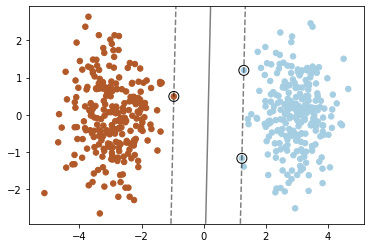

In [4]:
"""
Part 2_1: plotting code taken from: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
"""
hard_SVM = HardMarginSVM()

# Fit the separable data
hard_SVM.fit(X,y)

# Get all support vectors
sv = np.where(hard_SVM.alphas > 1e-6)[0]
support_vectors = X[sv]

# plot
plot_support_vectors(X,y,support_vectors,hard_SVM)

     pcost       dcost       gap    pres   dres
 0: -3.9810e+01 -1.2077e+02  3e+03  4e+01  3e+00
 1: -1.2755e+02 -3.2260e+02  2e+03  3e+01  3e+00
 2: -3.0386e+02 -7.3898e+02  2e+03  3e+01  2e+00
 3: -1.3389e+03 -2.3658e+03  2e+03  2e+01  2e+00
 4: -1.6454e+03 -2.8483e+03  2e+03  2e+01  2e+00
 5: -6.0342e+03 -7.3818e+03  1e+03  2e+01  1e+00
 6: -1.5849e+04 -1.8369e+04  3e+03  2e+01  1e+00
 7: -9.1407e+04 -9.6582e+04  5e+03  1e+01  1e+00
 8: -8.0515e+05 -8.3171e+05  3e+04  1e+01  1e+00
 9: -1.1939e+07 -1.2158e+07  2e+05  1e+01  1e+00
10: -5.7910e+08 -5.8060e+08  2e+06  1e+01  1e+00
11: -1.5696e+11 -1.5707e+11  1e+08  1e+01  1e+00
12: -1.5734e+11 -1.5745e+11  1e+08  1e+01  1e+00
13: -1.5737e+11 -1.5748e+11  1e+08  1e+01  1e+00
14: -1.6693e+11 -1.6705e+11  1e+08  1e+01  1e+00
15: -1.8745e+11 -1.8758e+11  1e+08  1e+01  1e+00
16: -2.5121e+11 -2.5134e+11  1e+08  1e+01  1e+00
17: -3.2117e+11 -3.2130e+11  1e+08  1e+01  1e+00
Terminated (singular KKT matrix).


/Users/tuantran/Desktop/cs584-m20-tuan-tran/AS4/src/implementation.py:17: UserWarning: No contour levels were found within the data range.
  linestyles=['--', '-', '--'])


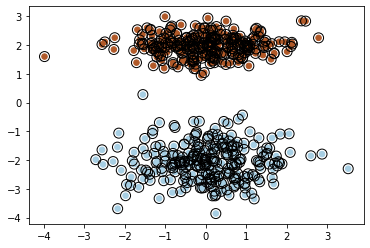

In [5]:
"""
Part 2_2: Hard margin SVM on non-separable data
"""
hard_SVM = HardMarginSVM()

# Fit the separable data
hard_SVM.fit(X_non_sep,y_non_sep)

# Get all support vectors
sv = np.where(hard_SVM.alphas > 1e-6)[0]
support_vectors = X_non_sep[sv]

# plot
plot_support_vectors(X_non_sep,y_non_sep,support_vectors,hard_SVM)

     pcost       dcost       gap    pres   dres
 0: -1.2891e+02 -2.4541e+04  7e+04  7e-01  1e-13
 1: -2.5046e+01 -3.8559e+03  6e+03  3e-02  1e-13
 2:  1.1612e+01 -1.7728e+02  3e+02  1e-03  3e-14
 3:  4.9092e+00 -8.0874e+00  1e+01  1e-05  7e-15
 4:  5.0732e-01 -1.2245e+00  2e+00  2e-16  5e-15
 5:  3.5595e-02 -5.0953e-01  5e-01  2e-16  2e-15
 6: -8.1407e-02 -5.1226e-01  4e-01  2e-16  1e-15
 7: -2.8766e-01 -5.5979e-01  3e-01  1e-16  1e-15
 8: -3.9521e-01 -4.0473e-01  1e-02  4e-16  1e-15
 9: -3.9935e-01 -3.9944e-01  1e-04  2e-16  1e-15
10: -3.9939e-01 -3.9939e-01  1e-06  2e-16  1e-15
11: -3.9939e-01 -3.9939e-01  1e-08  3e-16  1e-15
Optimal solution found.


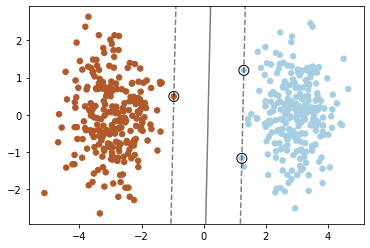

In [6]:
"""
Part 3_1: soft margin SVM on separable data
"""
soft_SVM = SoftMarginSVM()

# Fit the separable data
soft_SVM.fit(X,y)

# Get all support vectors
sv = np.where(soft_SVM.alphas > 1e-6)[0]
support_vectors = X[sv]

# plot
plot_support_vectors(X,y,support_vectors,soft_SVM)

     pcost       dcost       gap    pres   dres
 0: -2.0797e+02 -2.8124e+04  8e+04  7e-01  8e-14
 1: -8.1459e+01 -5.6926e+03  8e+03  5e-02  6e-14
 2: -3.8309e+01 -9.8323e+02  1e+03  5e-03  3e-14
 3: -4.5557e+01 -3.5702e+02  4e+02  1e-03  3e-14
 4: -5.1666e+01 -3.5113e+02  3e+02  1e-03  3e-14
 5: -4.8652e+01 -3.0976e+02  3e+02  7e-04  3e-14
 6: -5.7320e+01 -2.5142e+02  2e+02  4e-04  2e-14
 7: -6.1386e+01 -1.7821e+02  1e+02  1e-04  2e-14
 8: -6.2164e+01 -1.3896e+02  8e+01  3e-05  2e-14
 9: -6.3898e+01 -1.2560e+02  6e+01  3e-05  2e-14
10: -6.2739e+01 -1.1990e+02  6e+01  1e-05  2e-14
11: -6.2767e+01 -1.1299e+02  5e+01  1e-05  2e-14
12: -6.6670e+01 -9.3211e+01  3e+01  4e-06  3e-14
13: -6.7123e+01 -9.3543e+01  3e+01  4e-06  3e-14
14: -7.0344e+01 -9.3196e+01  2e+01  3e-06  3e-14
15: -7.6938e+01 -8.0013e+01  3e+00  2e-07  3e-14
16: -7.7467e+01 -7.8717e+01  1e+00  6e-08  3e-14
17: -7.7452e+01 -7.8303e+01  9e-01  7e-15  3e-14
18: -7.7823e+01 -7.7909e+01  9e-02  4e-15  3e-14
19: -7.7865e+01 -7.78

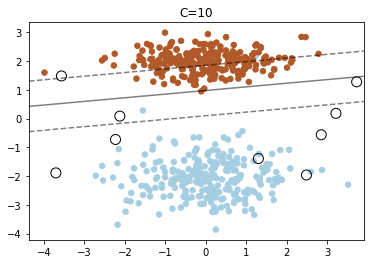

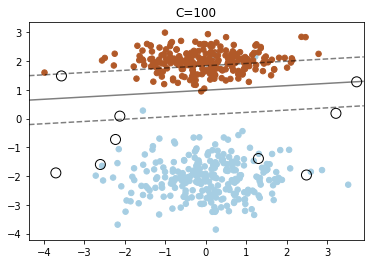

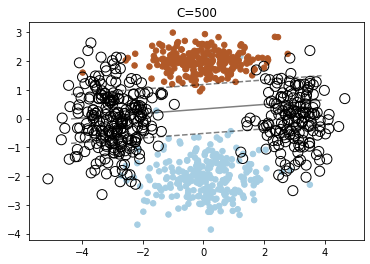

In [7]:
"""
Part 3_2: soft margin SVM on non-separable data
"""
C = [10, 100, 500]
for c in C:
    soft_SVM = SoftMarginSVM()

    # Fit the separable data
    soft_SVM.fit(X_non_sep,y_non_sep,C=c)

    # Get all support vectors
    sv = np.where(soft_SVM.alphas > 1e-6)[0]
    support_vectors = X[sv]

    # plot
    plt.figure()
    plot_support_vectors(X_non_sep,y_non_sep,support_vectors,soft_SVM)
    plt.title(f'C={c}')

     pcost       dcost       gap    pres   dres
 0: -1.2820e+02 -2.2050e+04  6e+04  6e-01  2e-12
 1: -2.6946e+01 -3.0116e+03  5e+03  3e-02  1e-12
 2:  5.5586e+00 -9.5184e+01  1e+02  7e-04  1e-13
 3:  2.5533e+00 -4.1980e+00  7e+00  7e-06  7e-15
 4:  2.7338e-01 -6.2626e-01  9e-01  2e-16  5e-15
 5:  2.1174e-02 -2.4225e-01  3e-01  2e-16  2e-15
 6: -3.1049e-02 -2.5032e-01  2e-01  3e-16  1e-15
 7: -1.0442e-01 -2.3049e-01  1e-01  2e-16  1e-15
 8: -1.0975e-01 -2.3229e-01  1e-01  2e-16  1e-15
 9: -1.6649e-01 -1.8025e-01  1e-02  2e-16  1e-15
10: -1.7163e-01 -1.7194e-01  3e-04  2e-16  2e-15
11: -1.7176e-01 -1.7177e-01  4e-06  2e-16  2e-15
12: -1.7176e-01 -1.7176e-01  4e-08  2e-16  2e-15
Optimal solution found.


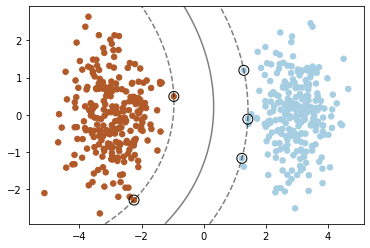

In [8]:
"""
Part 4: Polynomial kernel SVM on separable data
"""
SVM = KernelSVM(kernel='polynomial',degree=2)

# Fit the separable data
SVM.fit(X,y)

# Get all support vectors
sv = np.where(SVM.alphas > 1e-6)[0]
support_vectors = X[sv]

# plot
plot_support_vectors(X,y,support_vectors,SVM)

     pcost       dcost       gap    pres   dres
 0: -1.7768e+02 -2.6064e+04  7e+04  7e-01  4e-13
 1: -7.5380e+01 -4.8393e+03  7e+03  4e-02  5e-13
 2: -4.6462e+01 -1.0530e+03  1e+03  5e-03  2e-13
 3: -3.8118e+01 -6.3018e+02  7e+02  3e-03  2e-13
 4: -2.7196e+01 -5.1687e+02  6e+02  2e-03  1e-13
 5: -3.2055e+01 -2.2594e+02  2e+02  5e-04  1e-13
 6: -3.2702e+01 -2.1516e+02  2e+02  4e-04  1e-13
 7: -4.2769e+01 -1.0091e+02  6e+01  5e-05  1e-13
 8: -4.7104e+01 -7.0250e+01  2e+01  2e-05  1e-13
 9: -4.7350e+01 -7.0451e+01  2e+01  2e-05  1e-13
10: -4.8068e+01 -6.8034e+01  2e+01  1e-05  1e-13
11: -5.2064e+01 -6.2990e+01  1e+01  3e-06  1e-13
12: -5.4726e+01 -5.5773e+01  1e+00  2e-07  2e-13
13: -5.4845e+01 -5.5563e+01  7e-01  1e-07  2e-13
14: -5.4933e+01 -5.5410e+01  5e-01  3e-08  2e-13
15: -5.5147e+01 -5.5161e+01  1e-02  9e-10  2e-13
16: -5.5154e+01 -5.5154e+01  1e-04  9e-12  2e-13
17: -5.5154e+01 -5.5154e+01  1e-06  9e-14  2e-13
Optimal solution found.


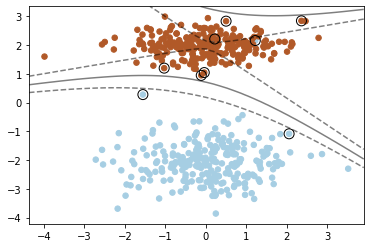

In [9]:
"""
Part 4_2: Polynomial kernel SVM on nonseparable data
"""
SVM = KernelSVM(kernel='polynomial',degree=2)

# Fit the separable data
SVM.fit(X_non_sep,y_non_sep)

# Get all support vectors
sv = np.where(SVM.alphas > 1e-6)[0]
support_vectors = X_non_sep[sv]

# plot
plot_support_vectors(X_non_sep,y_non_sep,support_vectors,SVM)

     pcost       dcost       gap    pres   dres
 0:  1.7831e+02 -1.0836e+04  2e+04  3e-01  5e-15
 1:  2.3795e+02 -1.2048e+03  2e+03  2e-02  6e-15
 2:  6.9787e+01 -1.1443e+02  2e+02  4e-05  4e-15
 3:  4.6567e+00 -2.1131e+01  3e+01  2e-15  3e-15
 4: -3.9811e-01 -1.3862e+01  1e+01  3e-15  2e-15
 5: -6.9932e+00 -1.4548e+01  8e+00  2e-16  2e-15
 6: -9.8958e+00 -1.1465e+01  2e+00  2e-15  4e-15
 7: -9.6197e+00 -1.1403e+01  2e+00  2e-15  3e-15
 8: -9.6522e+00 -1.1373e+01  2e+00  2e-15  4e-15
 9: -1.0411e+01 -1.0781e+01  4e-01  1e-15  4e-15
10: -1.0603e+01 -1.0621e+01  2e-02  7e-16  5e-15
11: -1.0614e+01 -1.0615e+01  2e-04  5e-15  5e-15
12: -1.0615e+01 -1.0615e+01  2e-06  5e-15  4e-15
Optimal solution found.


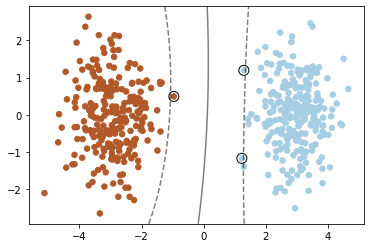

In [10]:
"""
Part 4_3: Gaussian kernel SVM on separable data
"""
SVM = KernelSVM(kernel='radial')

# Fit the separable data
SVM.fit(X,y)

# Get all support vectors
sv = np.where(SVM.alphas > 1e-6)[0]
support_vectors = X[sv]

# plot
plot_support_vectors(X,y,support_vectors,SVM)

     pcost       dcost       gap    pres   dres
 0:  2.0213e+02 -1.7342e+04  4e+04  4e-01  9e-15
 1:  3.9252e+02 -2.0218e+03  3e+03  6e-03  1e-14
 2:  4.2245e+00 -2.8845e+02  3e+02  2e-04  9e-15
 3: -4.1861e+01 -1.6709e+02  1e+02  8e-05  7e-15
 4: -4.9700e+01 -1.5958e+02  1e+02  6e-05  7e-15
 5: -5.0950e+01 -1.5270e+02  1e+02  4e-05  6e-15
 6: -5.8467e+01 -1.4137e+02  8e+01  3e-05  6e-15
 7: -6.4658e+01 -1.3004e+02  7e+01  1e-05  7e-15
 8: -7.0548e+01 -1.2484e+02  5e+01  8e-06  8e-15
 9: -7.0060e+01 -1.2019e+02  5e+01  5e-06  7e-15
10: -7.3975e+01 -1.1545e+02  4e+01  2e-06  8e-15
11: -8.0326e+01 -1.0091e+02  2e+01  9e-07  8e-15
12: -8.5057e+01 -9.2416e+01  7e+00  9e-08  1e-14
13: -8.7119e+01 -8.9377e+01  2e+00  9e-16  1e-14
14: -8.7823e+01 -8.8508e+01  7e-01  1e-14  1e-14
15: -8.8147e+01 -8.8156e+01  9e-03  2e-14  1e-14
16: -8.8151e+01 -8.8152e+01  9e-05  2e-14  1e-14
17: -8.8152e+01 -8.8152e+01  9e-07  2e-14  1e-14
Optimal solution found.


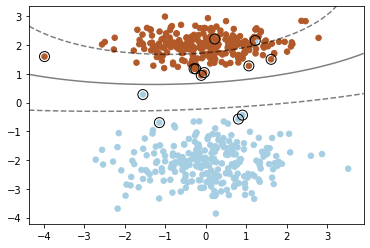

In [11]:
"""
Part 4_4: Gaussian kernel SVM on nonseparable data
"""
SVM = KernelSVM(kernel='radial')

# Fit the separable data
SVM.fit(X_non_sep,y_non_sep)

# Get all support vectors
sv = np.where(SVM.alphas > 1e-6)[0]
support_vectors = X_non_sep[sv]

# plot
plot_support_vectors(X_non_sep,y_non_sep,support_vectors,SVM)